## "Shared heritage"
Management and integration of cultural heritage data across Arches-based platforms in the Global South

<div>
<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/arches-v7-hp-EAMENA-0184608_.png" width = "500">


Big Historical Data conference - Environments of big cultural heritage data integration <br><sup> 22-25 Nov 2023, Jena, Germany, Max Planck Institute of Geoanthropology, https://bhdc.earth/</sup>

<sup><img src="https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png" vertical-align="middle;" width="30"> <https://github.com/achp-project></sup>

</center>
</div>



| Thomas Huet              | Alan Tapscott            | Jonas Gregorio de Souza  | Junaid Abdul Jabbar      | Manoj Lokare             | Ash Smith                |
|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| University of Oxford     | Universitat Pompeu Fabra  | Universitat Pompeu Fabra  | University of Cambridge   | University of Cambridge   | University of Southampton |
| prj EAMENEA               | prj MAPHSA               | prj MAPHSA               | prj MASHA                 | prj MAEASAM               | prj MaREA                 |
| thomas.huet@arch.ox.ac.uk | alan.tapscott@upf.edu     | jonas.gregorio@upf.edu    | ja738@cam.ac.uk           | ml2098@cam.ac.uk          | ash.smith@soton.ac.uk     |


| Mike Fisher              | Mahmoud Abdelrazek       | Bryan Alvey              | Marco Nebbia             | Krisztina Baranyai       |
|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| Max Planck Institute     | UCL                      | UCL Institute of Archaeology | UCL Institute of Archaeology | Kyoto University          |
| prj MAPSS                | prj MASHA and MAEASAM    | prj MAEASAM               | prj MAPSHA               | prj MAHS                 |
| michael.fisher@shh.mpg.de | mahmoud.abdelrazek@ucl.ac.uk | bryan.alvey@blueyonder.co.uk | m.nebbia@ucl.ac.uk        | krisztina.baranyai@cseas.kyoto-u.ac.jp |




#### 🖥️ first..
> Load GitHub repository, requirements and libraries

In [1]:
# ACHP parser
!rm /content/cultural-heritage -R
!git clone --quiet https://github.com/achp-project/cultural-heritage.git
!pip install  -q -r cultural-heritage/graph-parser/requirements.txt
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm

# EAMENA erms
%cd /content/
!rm /content/eamena-functions -R
!git clone --quiet https://github.com/eamena-project/eamena-functions.git
%cd /content/eamena-functions/
import mds

import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import HTML
from IPython.display import IFrame
from pyvis import network as net
import folium
import json

/content/cultural-heritage/graph-parser
/content
/content/eamena-functions


### Context

### Where

In [2]:
gm.projects_extent()

### What

In [ ]:
IFrame('https://database.eamena.org/', width=1000, height=400)

In [ ]:
IFrame('https://maeasam.org/', width=1000, height=500)

## Resource Models


<center>

<img src = "https://www.musee-bartholdi.fr/sites/museebartholdi/files/styles/large/public/auguste_bartholdi/statue_liberte/liberte-colmar05_0.jpg" width = "600"><br>
<font color='darkgrey'>Sharing models to facilitate data sharing</font>
</center>


### Basic example

In [2]:
gm.example_cidoc_subgraph()

### Available Resource Models


In [3]:
resource_models = gm.rm_list()
resource_models

{'CAAL': 'https://raw.githubusercontent.com/achp-project/prj-caal/main/resource_models/arches/CAAL-SitesAndMonuments.json',
 'EAMENA': 'https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json',
 'MAHS': 'https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json',
 'MAHSA': 'https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json',
 'MAEASAM': 'https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json',
 'MAPSS': 'https://raw.githubusercontent.com/achp-project/prj-mapss/main/pkg/graphs/Heritage%20Place%20(3).json'}

<https://github.com/achp-project/prj-mahsa/blob/main/resource-models/Heritage%20Location%20Resource%20Model.json#L5100-L5117>

## Comparisons

In [21]:
# %cd /content/cultural-heritage/graph-parser/
checkboxes_dict = gm.generate_checkboxes_from_dict(resource_models)
interactive_widget = interactive(gm.get_and_print_checked_values, **checkboxes_dict)
display(interactive_widget)

interactive(children=(Checkbox(value=False, description='CAAL'), Checkbox(value=False, description='EAMENA'), …

In [24]:
!ls /content/cultural-heritage/graph-parser/inputResourceModels

In [28]:
!rm /content/cultural-heritage/graph-parser/inputResourceModels -R
!mkdir -p /content/cultural-heritage/graph-parser/inputResourceModels
%cd /content/cultural-heritage/graph-parser

gm.rm_selected(checkboxes_dict, resource_models)

/content/cultural-heritage/graph-parser
Selected projects: ['EAMENA', 'MAHS']
Selected RMs: {'EAMENA': 'https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json', 'MAHS': 'https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json'}


### Subgraph metrics



In [29]:
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m compare -o comparisonMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
comparison_metrics = pd.read_csv('comparisonMetrics.csv')
subgraph_metrics = gm.subgraph_metrics()
comparison_metrics = gm.comparison_metrics()

In [30]:
subgraph_metrics

G                source                   target  \
0    EAMENA              E27_Site                E53_Place   
1    EAMENA              E27_Site                E53_Place   
2    EAMENA         E54_Dimension               E60_Number   
3    EAMENA         E54_Dimension               E60_Number   
4    EAMENA         E54_Dimension               E60_Number   
..      ...                   ...                      ...   
235    MAHS              E27_Site  E84_Information_Carrier   
236    MAHS  E64_End_of_Existence            E52_Time-Span   
237    MAHS        E42_Identifier                 E50_Date   
238    MAHS              E27_Site     E26_Physical_Feature   
239    MAHS        E42_Identifier           E42_Identifier   

                               property  \
0    P53_has_former_or_current_location   
1    P53_has_former_or_current_location   
2                         P90_has_value   
3                         P90_has_value   
4                         P90_has_value   
..                                  ...   
235                 P62i_is_depicted_by   
236                    P4_has_time-span   
237                 P1_is_identified_by   
238              P130_shows_features_of   
239                      L54_is_same-as   

                                 source_id  \
0         E27_Site_EAMENA_Heritage%20Place   
1         E27_Site_EAMENA_Heritage%20Place   
2    E54_Dimension_EAMENA_Heritage%20Place   
3    E54_Dimension_EAMENA_Heritage%20Place   
4    E54_Dimension_EAMENA_Heritage%20Place   
..                                     ...   
235                     E27_Site_MAHS_Site   
236         E64_End_of_Existence_MAHS_Site   
237               E42_Identifier_MAHS_Site   
238                     E27_Site_MAHS_Site   
239               E42_Identifier_MAHS_Site   

                              target_id            source_name  \
0     E53_Place_EAMENA_Heritage%20Place         Heritage Place   
1     E53_Place_EAMENA_Heritage%20Place         Heritage Place   
2    E60_Number_EAMENA_Heritage%20Place        Depth/Elevation   
3    E60_Number_EAMENA_Heritage%20Place        Depth/Elevation   
4    E60_Number_EAMENA_Heritage%20Place             Dimension    
..                                  ...                    ...   
235   E84_Information_Carrier_MAHS_Site                   Site   
236             E52_Time-Span_MAHS_Site       End of Existence   
237                  E50_Date_MAHS_Site              Import ID   
238      E26_Physical_Feature_MAHS_Site                   Site   
239            E42_Identifier_MAHS_Site  External Identifier 3   

                     target_name  
0                      Geography  
1                       Geometry  
2    Minimum Depth/Max Elevation  
3    Maximum Depth/Min Elevation  
4             Measurement Number  
..                           ...  
235        Information Carrier 2  
236   End of Existence Time Span  
237                         Date  
238       Formal Characteristics  
239      External Identifier URL  

[240 rows x 8 columns]

In [31]:
comparison_metrics

G                    source                 target  \
0   both             E54_Dimension             E60_Number   
1   both           E16_Measurement               E55_Type   
2   both                  E55_Type               E55_Type   
3   both        E3_Condition_State               E55_Type   
4   both           E16_Measurement          E54_Dimension   
5   both                 E53_Place               E55_Type   
6   both                 E53_Place              E53_Place   
7   both                 E53_Place            E45_Address   
8   both                 E53_Place  E44_Place_Appellation   
9   both                  E27_Site               E55_Type   
10  both                  E27_Site         E42_Identifier   
11  both  E14_Condition_Assessment     E3_Condition_State   
12  both  E13_Attribute_Assignment             E62_String   
13  both  E13_Attribute_Assignment               E55_Type   
14  both           E41_Appellation               E55_Type   
15  both             E54_Dimension   E58_Measurement_Unit   
16  both               E45_Address               E55_Type   

                  property                      source_id  \
0            P90_has_value             E54_Dimension_both   
1              P2_has_type           E16_Measurement_both   
2              P2_has_type                  E55_Type_both   
3              P2_has_type        E3_Condition_State_both   
4   P40_observed_dimension           E16_Measurement_both   
5              P2_has_type                 E53_Place_both   
6         P89_falls_within                 E53_Place_both   
7     P87_is_identified_by                 E53_Place_both   
8     P87_is_identified_by                 E53_Place_both   
9              P2_has_type                  E27_Site_both   
10     P1_is_identified_by                  E27_Site_both   
11      P35_has_identified  E14_Condition_Assessment_both   
12             P3_has_note  E13_Attribute_Assignment_both   
13             P2_has_type  E13_Attribute_Assignment_both   
14             P2_has_type           E41_Appellation_both   
15            P91_has_unit             E54_Dimension_both   
16             P2_has_type               E45_Address_both   

                     target_id  
0              E60_Number_both  
1                E55_Type_both  
2                E55_Type_both  
3                E55_Type_both  
4           E54_Dimension_both  
5                E55_Type_both  
6               E53_Place_both  
7             E45_Address_both  
8   E44_Place_Appellation_both  
9                E55_Type_both  
10         E42_Identifier_both  
11     E3_Condition_State_both  
12             E62_String_both  
13               E55_Type_both  
14               E55_Type_both  
15   E58_Measurement_Unit_both  
16               E55_Type_both

### Graph drawing



#### Individual graphs

EAMENA


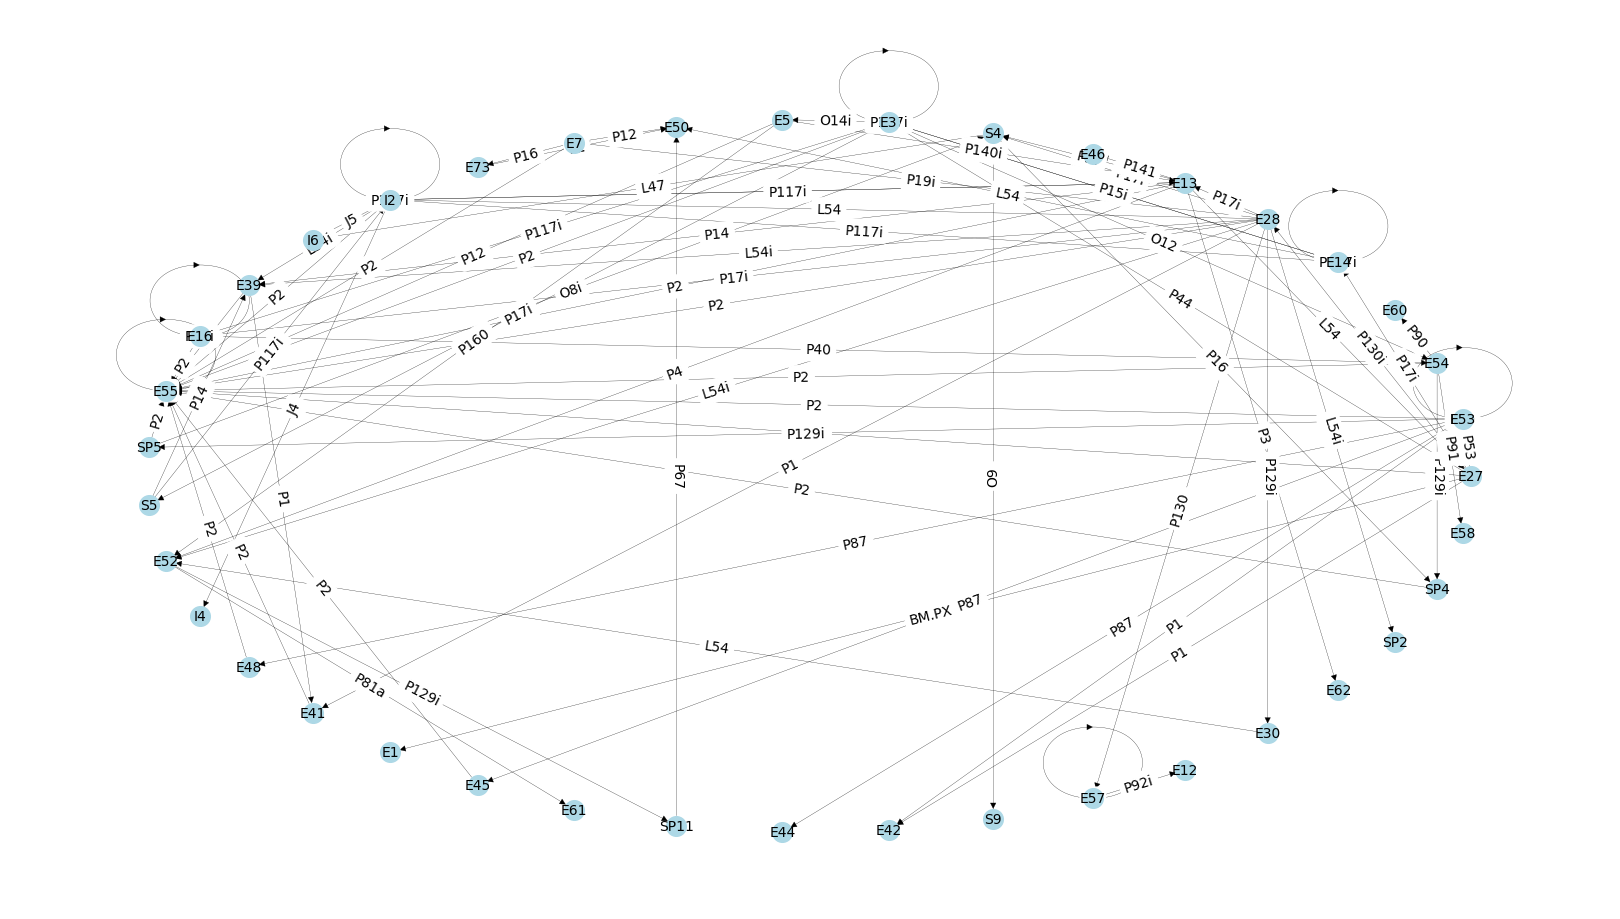

MAHS


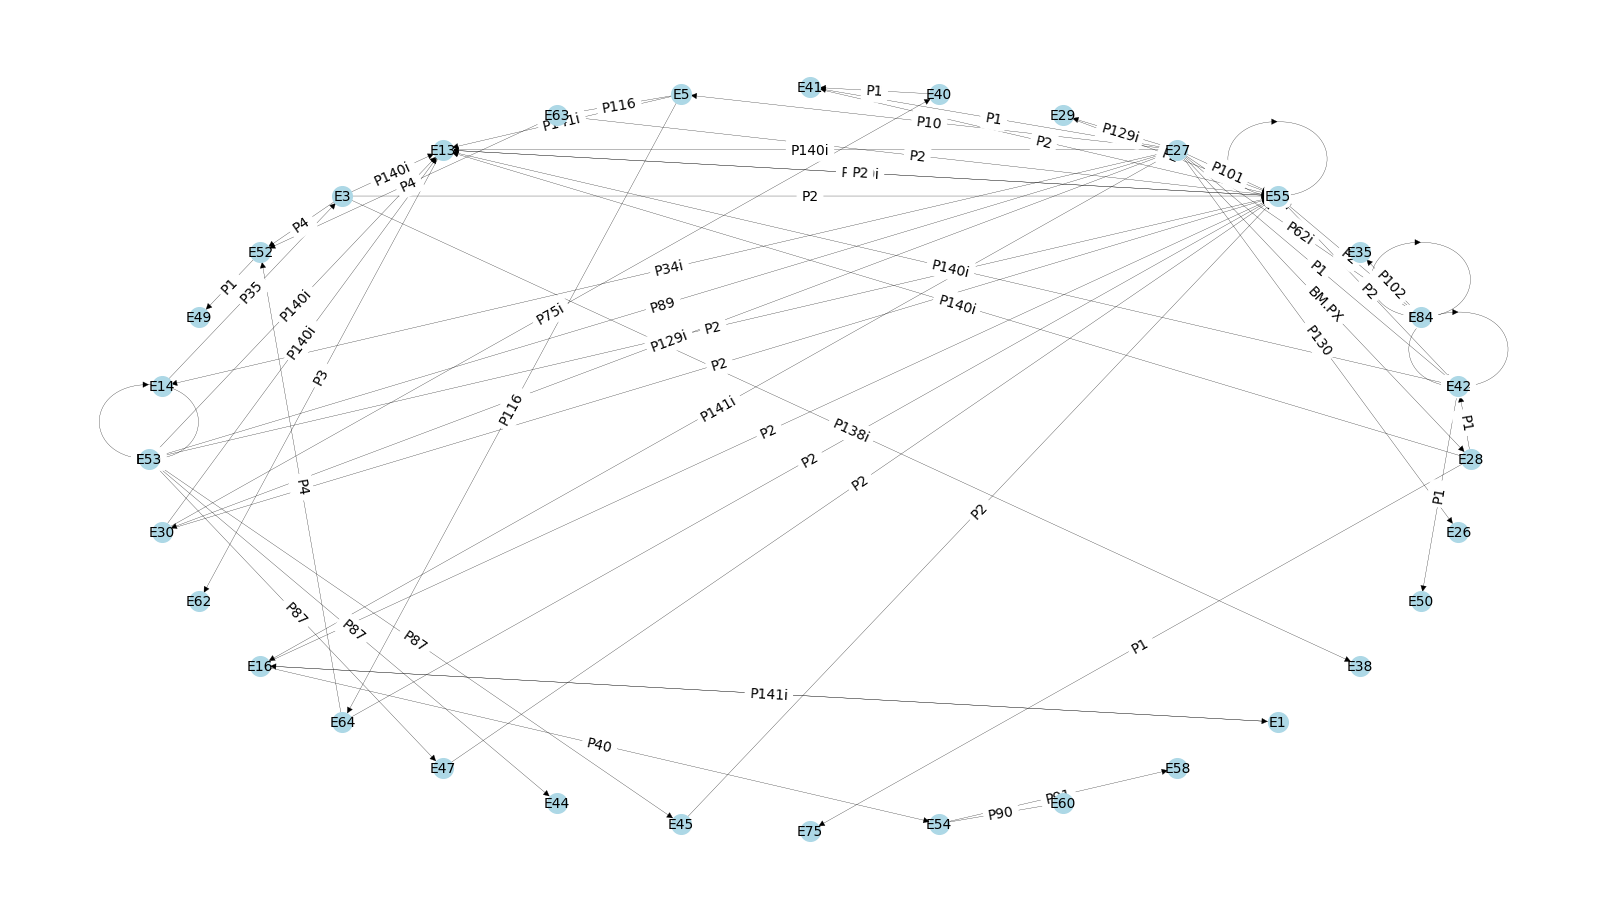

both


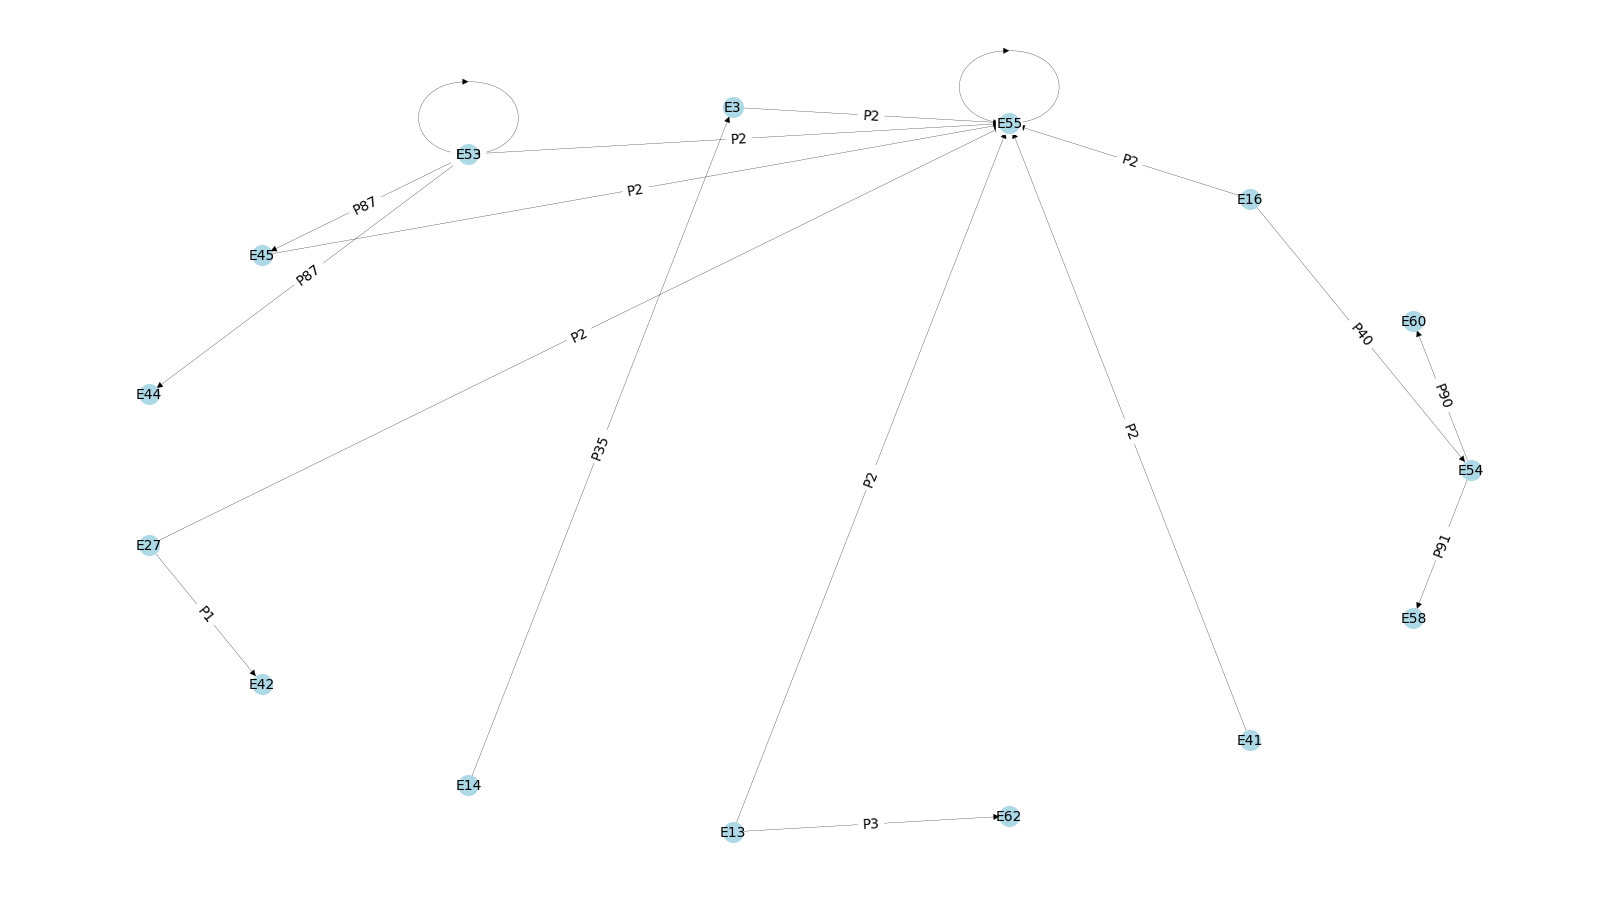

In [32]:
gm.plot_all_G(subgraph_metrics, comparison_metrics)

#### Combined graphs

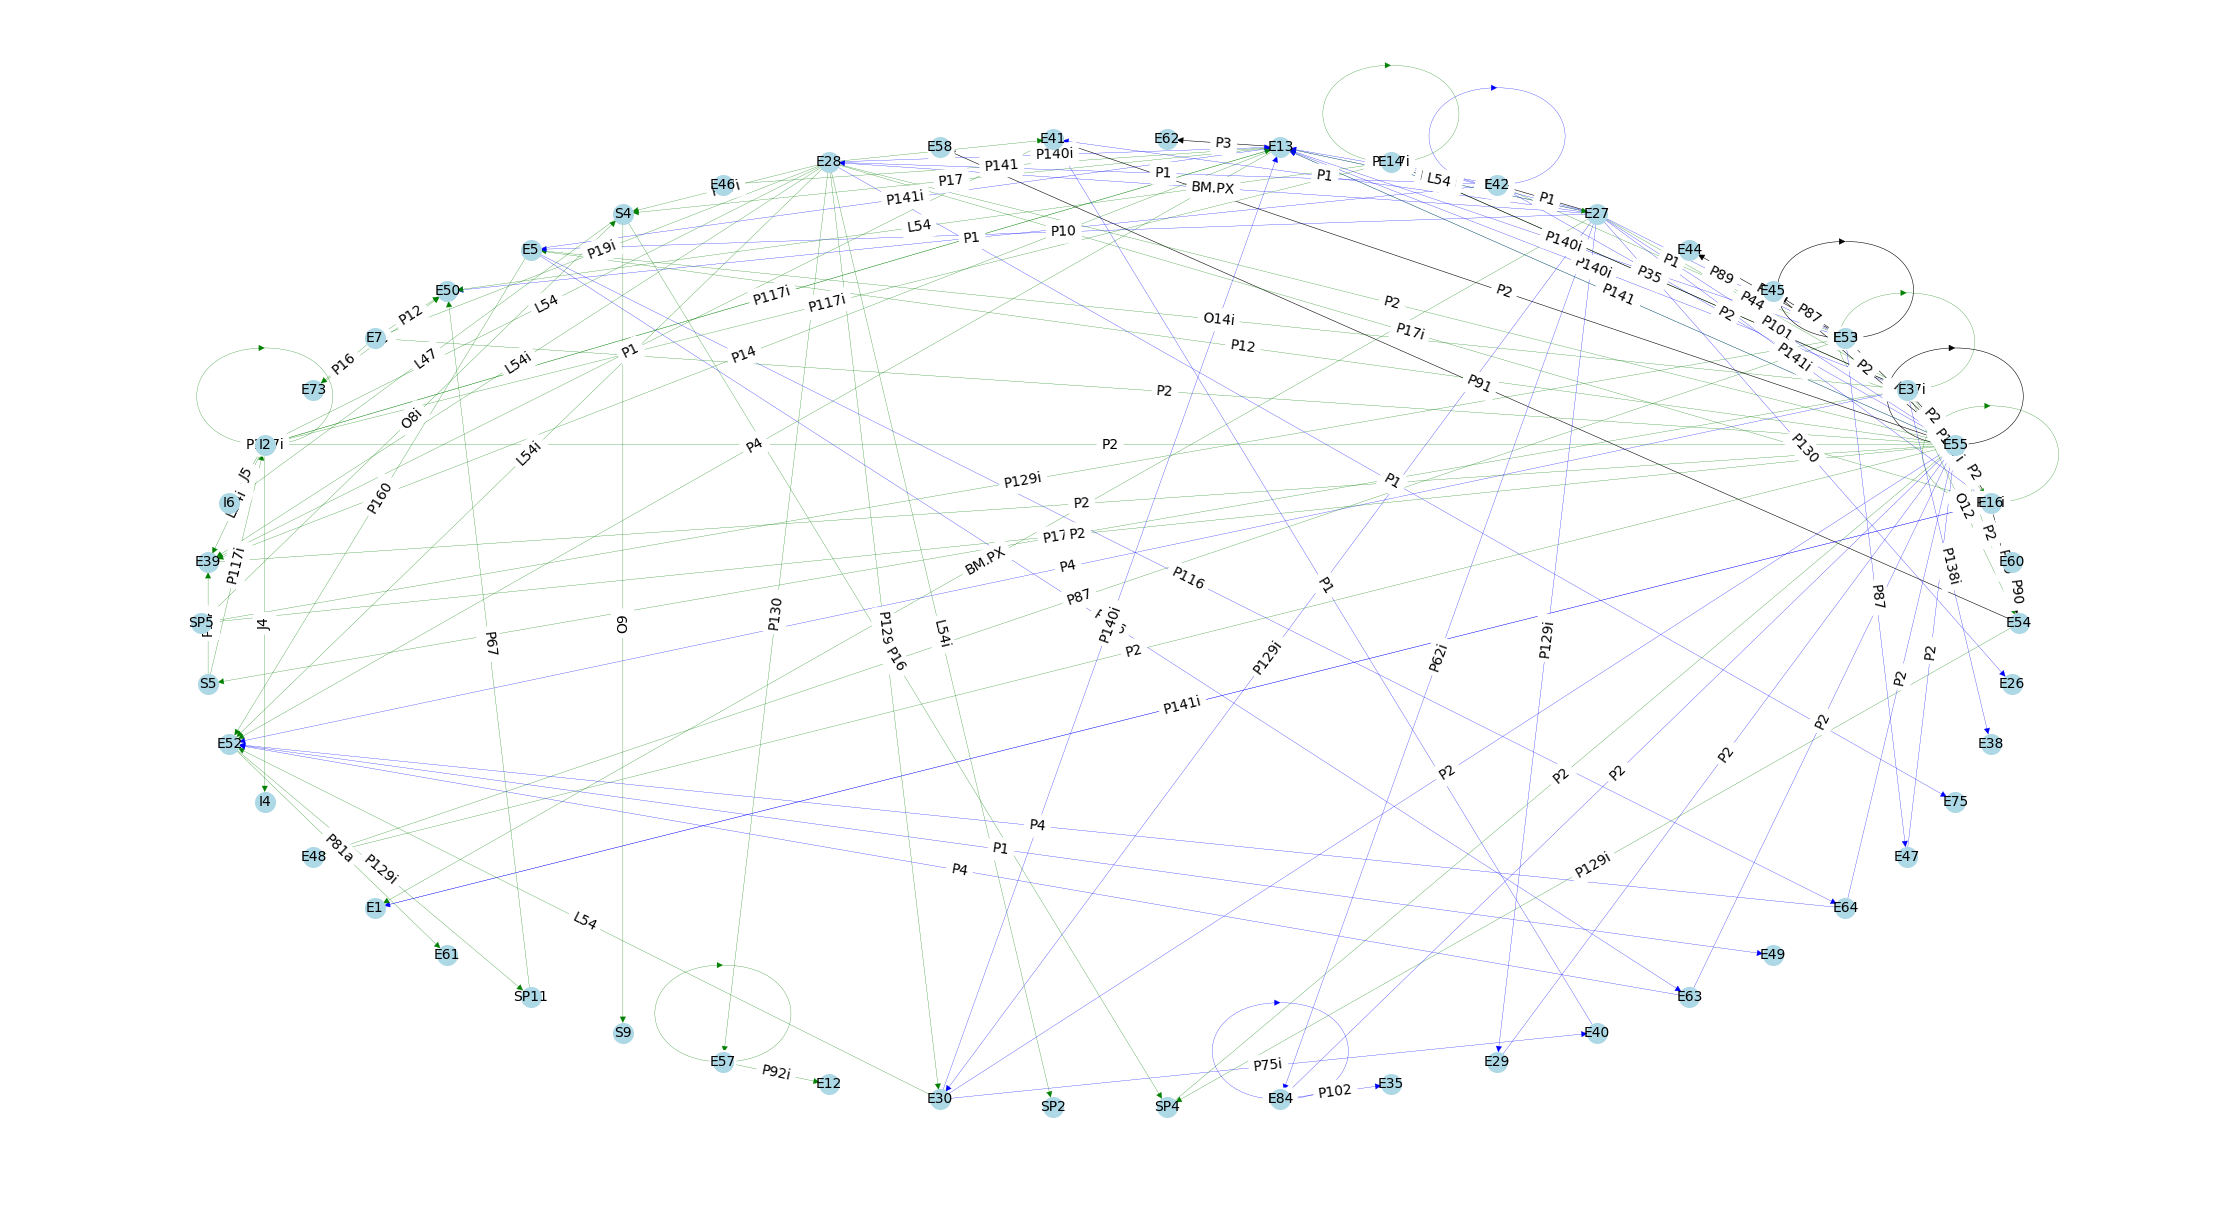

In [33]:
G = gm.all_nx_G(subgraph_metrics, comparison_metrics)
gm.plot_all_nx_G(G)

#### Interactive graphs

In [37]:
%cd /content/cultural-heritage/graph-parser/
from mds import mds
# gm.rm_one_selected('EAMENA', resource_models)

# !python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
# subgraph_metrics = pd.read_csv('subgraphMetrics.csv')

# %cd /content/eamena-functions/mds
rm_project= 'EAMENA'
filename = rm_project + ".html"
# mds_template_df = mds.mds_template()
# mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
# mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
# in_erms = list(mds_template_df['uuid_sql'])
# df_color = mds.mds_field_colors()
G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds.mds_field_colors())
hp_G = gm.plot_net_graph(G, filename = filename, width = "1200px", height = "1000px")
HTML(filename=filename)
# gm.plot_all_pyvis_G(G, "pyvis-example")

/content/cultural-heritage/graph-parser


## RDF

In [38]:
!python graph_comparator.py -ns "http://eamena#" -ns "http://maphsa#" "EAMENA Heritage Place.json" "MAPHSA Heritage Item.json"

Traceback (most recent call last):
  File "/content/cultural-heritage/graph-parser/graph_comparator.py", line 263, in <module>
    main()
  File "/content/cultural-heritage/graph-parser/graph_comparator.py", line 241, in main
    args = validate_parameters(args)
  File "/content/cultural-heritage/graph-parser/graph_comparator.py", line 53, in validate_parameters
    raise Exception(f"Invalid input Graph file provided with value {in_file}")
Exception: Invalid input Graph file provided with value EAMENA Heritage Place.json


### Triple store and SPARQL

example: Ariadne subjects (10 first)


```sparql
PREFIX aocat: <https://www.ariadne-infrastructure.eu/resource/ao/cat/1.1/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
select distinct ?as ?lab where {
  ?resource aocat:has_ARIADNE_subject ?as .
    ?as rdfs:label ?lab .
} limit 10
```

In [41]:
IFrame('https://graphdb.ariadne.d4science.org/sparql', width=1000, height=400)

## Perspectives

* Persistancy
* Bring closer cultural heritage data managers and researchers